# **TOPIK: DATA PREPARATION FOR FORECASTING (A1)**

# Identify multiple source data

1. Identifikasi dataset yang diberikan sebagai berikut:
https://www.kaggle.com/shree1992/housedata

2. jelaskan kategori atau tipe data untuk masing - masing atribut atau variable
3. baca dataset tersebut dengan Python pandas dan berikan dokumentasi sederhana mengenai cara kerja



In [ ]:
#MASUKAN JAWABAN A1 disini (jika jawaban merupakan isian, gunakan comment Python #
# connect google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/datasheet/data.csv")
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [ ]:
#Syntax untuk mengetahui tipe data untuk masing masing variabel
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
#Maka, tipe daya masing masing variabel telah ditampilkan seperti diatas yang mana
#date:object, price:float64, bedrooms:float64, bathrooms:float64, sqft_living:int64,
#sqft_lot:int64, floors:float64, waterfront:int64, view:int64, condition:int64,
#sqft_above:int64, sqft_basement:int64, yr_built:int64, yr_renovated:int64, street:object, city:object, statezip:object, country:object

# **TOPIK: DATA PREPROCESSING FOR FORECASTING (B1)**

1. Berdasarkan data A1 yang sudah anda baca, jelaskan tujuan dari forecasting apa yang ingin dilakukan?

2. jelaskan bagaimana cara mengatasi missing value, tuliskan dalam Python

3. ubahlah format yang sesuai dengan tugas forecasting (misalkan nilai harus bernilai integer, dan kalimat harus bernilai string, dll), tuliskan dalam Python

4. apakah perlu ada normalisasi pada dataset? jika iya, metode normalisasi apa yang anda gunakan? jelaskan pilihan anda, tuliskan dalam Python

5. pisahkan dataset menjadi data latih dan data uji menggunakan Python sklearn train test split yang sebelumnya perlu dipisahkan terlebih dahulu variable X merupakan independent variable dan variable y merupakan dependent variable, tuliskan dalam Python


In [ ]:
#MASUKAN JAWABAN B1 disini (jika jawaban merupakan isian, gunakan comment Python #
# Tujun dari Forecasting dalam kasus diatas adalah memprediksi harga rumah sekaligus kemana arah pergerakan harga properti yang mana
# merupakan indikator yang baik untuk kondisi pasar secara keseluruhan dan kesehatan ekonomi suatu negara.

#Missing value
# dapat diatasi dengan mengganti missing value dengan rata rata, atau dapat menghapusnya.
import pandas as pd #(Mengimport library pandas)
missing_values = ["0"] #(mendefinisikan bahwa kolom yang berisi '0' sebagai variabel missing_values)
df_missing = pd.read_csv("/content/drive/My Drive/datasheet/data.csv", na_values = missing_values) #(mengubah semua yang termasuk didalam missing_values menjadi na_values yang berarti nan)
df_missing.head(5) # (menampilkan tabel sesudah diubah)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,NaN,NaN,3,1340,NaN,1955,2005.0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,NaN,4.0,5,3370,280.0,1921,NaN,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,NaN,NaN,4,1930,NaN,1966,NaN,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,NaN,NaN,4,1000,1000.0,1963,NaN,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,NaN,NaN,4,1140,800.0,1976,1992.0,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df_missing.drop(['waterfront','view'], axis=1, inplace=True)

In [ ]:
# yr_renovated	
# Langkah 1
df_yr = df_missing
# Langkah 2
rata2 = df_yr['yr_renovated'].mean()
# Langkah 3
df_yr['yr_renovated'] = df_yr['yr_renovated'].fillna(rata2)
# Langkah 4
df_yr['yr_renovated'].isna().sum()

0

In [ ]:
df_missing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,3,1340,NaN,1955,2005.00000,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,5,3370,280.0,1921,1994.42252,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,4,1930,NaN,1966,1994.42252,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,4,1000,1000.0,1963,1994.42252,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,4,1140,800.0,1976,1992.00000,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df_missing.isna().sum()

In [ ]:
# PRICE
df_prc = df_missing
rata2 = df_prc['price'].mean()
df_prc['price'] = df_prc['price'].fillna(rata2)
df_prc['price'].isna().sum()

In [ ]:
df_missing.isna().sum()

In [ ]:
# BEDROOM
df_bd = df_missing
rata2 = df_bd['bedrooms'].mean()
df_bd['bedrooms'] = df_bd['bedrooms'].fillna(rata2)
df_bd['bedrooms'].isna().sum()

0

In [ ]:
# BATHROOMS
df_bth = df_missing
rata2 = df_bth['bathrooms'].mean()
df_bth['bathrooms'] = df_bth['bathrooms'].fillna(rata2)
df_bth['bathrooms'].isna().sum()

0

In [ ]:
# SQFT_BASEMENT
# Langkah 1
df_sqftb = df_missing
# Langkah 2
rata2 = df_sqftb['sqft_basement'].mean()
# Langkah 3
df_sqftb['sqft_basement'] = df_sqftb['sqft_basement'].fillna(rata2)
# Langkah 4
df_sqftb['sqft_basement'].isna().sum()

0

In [ ]:
df_missing.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
# Mengubah variabel "Price" menjadi integer
df_missing["price"] = df_missing["price"].astype("int")
df_missing.dtypes

date              object
price              int64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
condition          int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
# Mengubah variabel "bedrooms" menjadi integer
df_missing["bedrooms"] = df_missing["bedrooms"].astype("int")
df_missing.dtypes

date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
condition          int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
# Mengubah variabel "sqft_basement" menjadi integer
df_missing["sqft_basement"] = df_missing["sqft_basement"].astype("int")
df_missing.dtypes

date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated     float64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
# Mengubah variabel "yr_renovated" menjadi integer
df_missing["yr_renovated"] = df_missing["yr_renovated"].astype("int")
df_missing.dtypes

date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
# Mengubah variabel "street" menjadi string
df_missing["street"] = df_missing["street"].astype("string")
df_missing.dtypes

date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            string
city              object
statezip          object
country           object
dtype: object

In [ ]:
# Mengubah variabel "city" menjadi integer
df_missing["city"] = df_missing["city"].astype("string")
df_missing.dtypes

date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            string
city              string
statezip          object
country           object
dtype: object

In [ ]:
# Mengubah variabel "Country" menjadi string
df_missing["country"] = df_missing["country"].astype("string")
df_missing.dtypes

date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            string
city              string
statezip          object
country           string
dtype: object

4. Tidak diperlukan Normalisasi data, karena hanya dengan menghilangkan missing value, dan merubah tipe datanya, sudah menjadi data yang cukup matang dan siap untuk di proses.


In [ ]:
from sklearn.model_selection import train_test_split
X = df_missing.iloc[:, 2:12]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
676,3,1.00,1660,7500,1.0,4,1060,600,1940,2001
2578,2,1.00,1120,2000,1.5,3,1120,773,1910,2006
1157,3,2.25,1470,1578,2.0,3,1090,380,2007,1994
4159,4,2.50,2610,5140,2.0,3,2610,773,2006,1994
1757,3,2.75,2390,9313,1.0,5,1390,1000,1942,1994
...,...,...,...,...,...,...,...,...,...,...
789,4,3.25,3120,5000,2.0,3,2370,750,2005,1994
968,4,1.00,1320,4440,1.5,3,1320,773,1929,1994
1667,2,2.50,1380,1073,2.0,3,1140,240,2011,1994
3321,4,2.50,2490,5170,2.0,4,2490,773,2000,1994


In [ ]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
486,4,2.50,2980,4930,2.0,3,2890,90,2000,1994
3206,4,1.75,2320,3825,1.5,5,1820,500,1926,1994
811,3,2.00,2220,6641,1.0,4,1220,1000,1947,1988
1948,5,3.00,2440,4750,1.0,3,1450,990,2006,1994
2488,4,2.50,2420,10285,1.0,3,1700,720,1958,2004
...,...,...,...,...,...,...,...,...,...,...
1543,4,3.50,4730,13586,1.5,5,4270,460,1935,1994
3360,4,2.75,2310,5650,1.0,3,1330,980,1952,2012
915,4,2.50,2460,4200,2.0,3,2460,773,1998,2006
3722,3,2.25,1640,3896,2.0,3,1640,773,1994,1994


In [ ]:
y_train

676     458000.0
2578    524000.0
1157    432000.0
4159    674600.0
1757    689800.0
          ...   
789     799000.0
968     387500.0
1667    285000.0
3321    725000.0
1688    686000.0
Name: price, Length: 3680, dtype: float64

# **TOPIK: DATA PREPROCESSING FOR CLUSTERING (B2)**

1. Diberikan suatu dataset https://www.kaggle.com/uciml/iris
apakah data tersebut bisa menjadi kasus clustering (pengelompokan berdasarkan kemiripan data?) jelaskan menurut bahasa anda dan variable apa yang dihilangkan agar kasus-nya menjadi clustering. baca dataset dengan Python

2. jelaskan bagaimana cara mengatasi missing value, tuliskan dalam Python

3. ubahlah format yang sesuai dengan tugas clustering (misalkan nilai harus bernilai integer, dan kalimat harus bernilai string, dll) atau tugas lainnya.. tuliskan dalam Python

4. apakah perlu ada normalisasi pada dataset? jika iya, metode normalisasi apa yang anda gunakan? jelaskan pilihan anda, tuliskan dalam Python

5. pisahkan dataset menjadi data latih dan data uji menggunakan Python sklearn train test split yang sebelumnya perlu dipisahkan terlebih dahulu variable X merupakan independent variable dan variable y merupakan dependent variable, tuliskan dalam Python


In [ ]:
# JAWABAN B2 NOMOR 1
# Data dari dataset Iris tersebut dapat menjadi kasus clustering karena dalam dataset tersebut data dapat dikelompokkan berdasarkan kemiripan data.
# Untuk variable yang dihilangkan tidak ada karena tidak ada data yang kosong 

# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca dataset di google drive
df = pd.read_csv("/content/drive/My Drive/datasheet/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#JAWABAN B2 NOMOR 2
# Mengatasi missing values

# 1. Pertama import library yg diperlukan dan baca dataset
# 2. Lalu cek apakah ada data yg kosong 
# 3. Kemudian buat variable untuk data kosong (missing values)
# 4. Jika ada data yang kosong maka dapat dihapus (dropna) atau mengganti dengan rata-rata(mean), ataupun diganti dengan nilai tengah(median) atau modus
# 5. Dalam datasheet Iris.csv ini tidak memiliki data yang kosong
df_missing = pd.read_csv("/content/drive/My Drive/datasheet/Iris.csv")
df_missing.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# JAWABAN B2 NOMOR 3
# Mengubah format sesuai dengan tugas clustering

# 1. Pertama cari tahu type data dari data yang ada di Iris.csv
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
# Kemudian cari data yang akan diganti sesuai dengan tugas clustering (kalimat = string, dsb)
# Disini akan dirubah Species dari yg semula object menjadi string
df["Species"] = df["Species"].astype("string")
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           string
dtype: object

In [ ]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
# JAWABAN B2 NOMOR 4
# Disini kami tidak menggunakan normalisasi untuk datasheet Iris.csv
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           string
dtype: object

In [ ]:
# JAWABAN B2 NOMOR 5
# X sebagai variable independent
# y sebagai variable dependent 

from sklearn.model_selection import train_test_split
X = df.iloc[:, 0:5]
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
X_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,15,5.8,4.0,1.2,0.2
24,25,4.8,3.4,1.9,0.2
139,140,6.9,3.1,5.4,2.1
58,59,6.6,2.9,4.6,1.3
8,9,4.4,2.9,1.4,0.2
...,...,...,...,...,...
107,108,7.3,2.9,6.3,1.8
21,22,5.1,3.7,1.5,0.4
0,1,5.1,3.5,1.4,0.2
131,132,7.9,3.8,6.4,2.0


In [ ]:
y_train

14         Iris-setosa
24         Iris-setosa
139     Iris-virginica
58     Iris-versicolor
8          Iris-setosa
            ...       
107     Iris-virginica
21         Iris-setosa
0          Iris-setosa
131     Iris-virginica
106     Iris-virginica
Name: Species, Length: 120, dtype: string

# **TOPIK: DATA PREPROCESSING FOR CLASSIFICATION (B3)**

1. Diberikan suatu dataset https://www.kaggle.com/ronitf/heart-disease-uci
apakah data tersebut bisa menjadi kasus classification (pengelompokan berdasarkan class data?) jelaskan menurut bahasa anda dan variable apa yang dihilangkan agar kasus-nya menjadi clustering. baca dataset dengan Python

2. jelaskan bagaimana cara mengatasi missing value, tuliskan dalam Python

3. ubahlah format yang sesuai dengan tugas classification (misalkan nilai harus bernilai integer, dan kalimat harus bernilai string, dll) atau tugas lainnya.. tuliskan dalam Python

4. apakah perlu ada normalisasi pada dataset? jika iya, metode normalisasi apa yang anda gunakan? jelaskan pilihan anda, tuliskan dalam Python

5. pisahkan dataset menjadi data latih dan data uji menggunakan Python sklearn train test split yang sebelumnya perlu dipisahkan terlebih dahulu variable X merupakan independent variable dan variable y merupakan dependent variable, tuliskan dalam Python


In [ ]:
#MASUKAN JAWABAN B3 disini (jika jawaban merupakan isian, gunakan comment Python #
heart = pd.read_csv("/content/drive/My Drive/datasheet/heart.csv")
heart
# 1.
#  Data terseur bisa menjadi kasus Classification dengan menggunakan variabel dari Age,Chol, dan Target
#  Dengan menggunakan ketiga variabel tersebut kita setidaknya mengetahui orang orang dengan rentan umur sekian, yang memiliki kadar kolestrol sekian, terkena penyakit jantung.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# 2. Missing value
# Kita hanya membutuhkan variabel Age, Chol, dan Target
# Mengidentifikasi karakter khusus di baris "Age"
heart["age"].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

Outputnya menandakan tidak ada karakter unik, berarti tidak terdapat juga karakter NAN pada baris Age.

In [ ]:
# Mengidentifikasi karakter khusus di baris "Chol"
heart["chol"].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131])

Outputnya menandakan tidak ada karakter unik, berarti tidak terdapat juga karakter NAN pada baris chol.

In [ ]:
#Mengidentifikasi karakter khusus di baris "Target"
heart["target"].unique()

array([1, 0])

Outputnya hanya mengeluarkan angka 1 dan 0 yang menandakan tidak ada karakter khusus di baris target, yang mana 1 menandakan terkena penyakit jantung, dan 0 menandakan tidak terkena penyakit jantung.

In [ ]:
# 3. Mengubah karakter khusus
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Karena disini tipe data pada setiap variabel sudah tertulis int dan float, maka tidak perlu diubah lagi karena sudah cukup jika akan diproses lebih lanjut.

In [ ]:
# 4. Normalisasi Data
# Diperlukan Normalisasi data, karena nilai Age, Cp, dan Chol tidak berada dalam 1 range yang sama, maka perlu dilakukan normalisasi data  menggunakan 
# Simple Feature Scalling
heart['age'] = heart['age'] / heart['age'].max()
heart = heart/ heart.max()
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.818182,1.0,1.000000,0.725,0.413121,1.0,0.0,0.742574,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.480519,1.0,0.666667,0.650,0.443262,0.0,0.5,0.925743,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.532468,0.0,0.333333,0.650,0.361702,0.0,0.0,0.851485,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.727273,1.0,0.333333,0.600,0.418440,0.0,0.5,0.881188,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.740260,0.0,0.000000,0.600,0.627660,0.0,0.5,0.806931,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.740260,0.0,0.000000,0.700,0.427305,0.0,0.5,0.608911,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.584416,1.0,1.000000,0.550,0.468085,0.0,0.5,0.653465,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.883117,1.0,0.000000,0.720,0.342199,1.0,0.5,0.698020,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.740260,1.0,0.000000,0.650,0.232270,0.0,0.5,0.569307,1.0,0.193548,0.5,0.25,1.000000,0.0


In [ ]:
# 5. Sklearn train test split

X = heart.iloc[:, 0:13]
y = heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
6,0.727273,0.0,0.333333,0.700,0.521277,0.0,0.0,0.757426,0.0,0.209677,0.5,0.00,0.666667
274,0.610390,1.0,0.000000,0.550,0.487589,0.0,0.0,0.584158,1.0,0.161290,0.5,0.25,0.666667
254,0.766234,1.0,1.000000,0.800,0.484043,0.0,0.0,0.618812,0.0,0.000000,1.0,0.00,0.666667
74,0.558442,0.0,0.666667,0.610,0.377660,0.0,0.5,0.816832,0.0,0.032258,0.5,0.00,0.666667
231,0.740260,1.0,0.000000,0.825,0.512411,1.0,0.0,0.613861,0.0,0.161290,0.5,0.75,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.740260,1.0,0.333333,0.620,0.462766,0.0,0.5,0.698020,0.0,0.048387,1.0,0.00,1.000000
256,0.753247,1.0,0.000000,0.640,0.459220,0.0,0.0,0.643564,1.0,0.483871,0.5,0.50,1.000000
131,0.636364,0.0,0.333333,0.670,0.480496,0.0,0.5,0.801980,0.0,0.000000,0.5,0.00,0.666667
249,0.896104,1.0,0.666667,0.700,0.450355,0.0,0.0,0.722772,0.0,0.322581,0.5,0.75,1.000000


In [ ]:
y_train

6      1.0
274    0.0
254    0.0
74     1.0
231    0.0
      ... 
277    0.0
256    0.0
131    1.0
249    0.0
152    1.0
Name: target, Length: 242, dtype: float64

# **TOPIK: DATA DEPENDENCY VISUALIZATION (C1)**

1. pada dataset A1 dan B1, identifikasi korelasi antara feature (independent variable) dan dependent variable dengan matrix korelasi, tuliskan dalam Python
2. pada no.1, bagian mana yang memiiki korelasi yang kuat, jelaskan alasan nya
3. gambarkan visualisasi dari feature
4. gambarkan visualisasi dari class label
5. gambarkan visualisasi dari atribut
6. gambarkan visualisasi dari aliran data

In [ ]:
# Bagian yang memiliki korelasi kuat yaitu Price(datasheet data.csv) dan Species(datasheet Iris.csv)
# Karena keduanya merupakan Dependent variable sementara yang lain adalah independent variable
# Disini kami membuat data.csv menjadi df_house
df_house = pd.read_csv("/content/drive/My Drive/datasheet/data.csv")
df_house.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [ ]:
# Lalu kami juga membuat Iris.csv menjadi df_iris
df_iris = pd.read_csv("/content/drive/My Drive/datasheet/Iris.csv")
df_iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


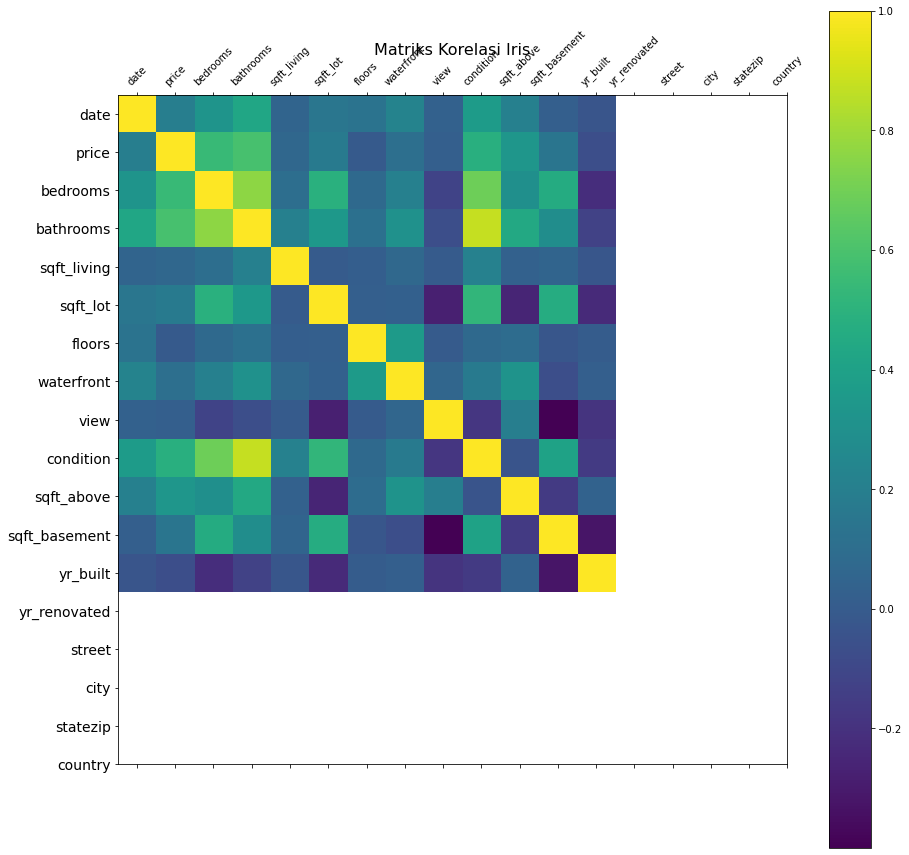

In [ ]:
# Matriks korelasi datasheet (data.csv) menggunakan sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15, 15))
plt.matshow(df_house.corr(), fignum=f.number)
plt.xticks(range(df_house.shape[1]), df_house.columns, fontsize=10, rotation=45)
plt.yticks(range(df_house.shape[1]), df_house.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Matriks Korelasi Iris', fontsize=16);

plt.show()

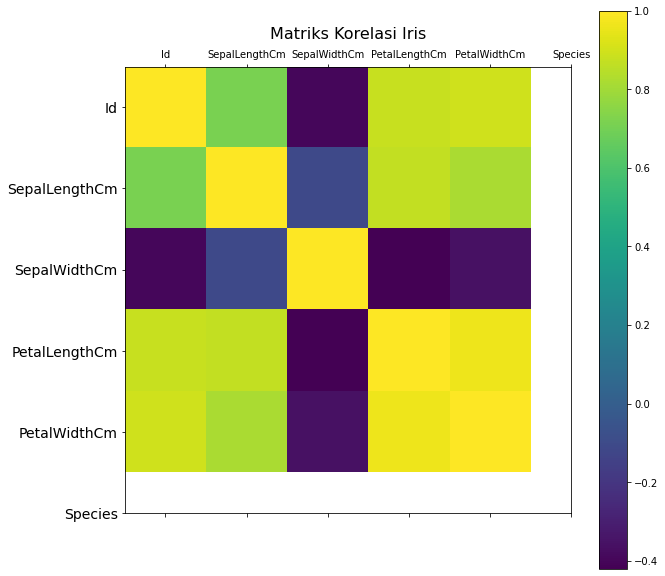

In [ ]:
# Matriks korelasi datasheet (iris.csv) menggunakan matplotlib
f = plt.figure(figsize=(10, 10))
plt.matshow(df_iris.corr(), fignum=f.number)
plt.xticks(range(df_iris.shape[1]), df_iris.columns, fontsize=10)
plt.yticks(range(df_iris.shape[1]), df_iris.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Matriks Korelasi Iris', fontsize=16);

plt.show()

# **TOPIK: DATA FORECASTING (D1)**

1. Berdasarkan data A1, tentukan feature yang akan digunakan
2. Buatlah rencana plan forecasting
3. Interpretasikan data menuju variable yang dapat digunakan
4. apakah dataset ini cocok untuk forecasting?
5. analisa atribut yang memiliki korelasi tinggi?
6. pilih feature yang digunakan untuk forecasting
7. pilih algoritma forecasting yang tepat
8. pilih Hyperparameter yang tepat
9. analisa dataset secara sederhana
10. analisa performa dari forecasting
11. analisa akurasi dari forecasting
12. analisa f-measure dengan sklearn

In [ ]:
#MASUKAN JAWABAN D1 disini (jika jawaban merupakan isian, gunakan comment Python #
df_missing

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000,3,1.50,1340,7912,1.5,3,1340,773,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000,5,2.50,3650,9050,2.0,5,3370,280,1921,1994,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000,3,2.00,1930,11947,1.0,4,1930,773,1966,1994,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000,3,2.25,2000,8030,1.0,4,1000,1000,1963,1994,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000,4,2.50,1940,10500,1.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166,3,1.75,1510,6360,1.0,4,1510,773,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333,3,2.50,1460,7573,2.0,3,1460,773,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904,3,2.50,3010,7014,2.0,3,3010,773,2009,1994,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400,4,2.00,2090,6630,1.0,3,1070,1020,1974,1994,5148 S Creston St,Seattle,WA 98178,USA


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



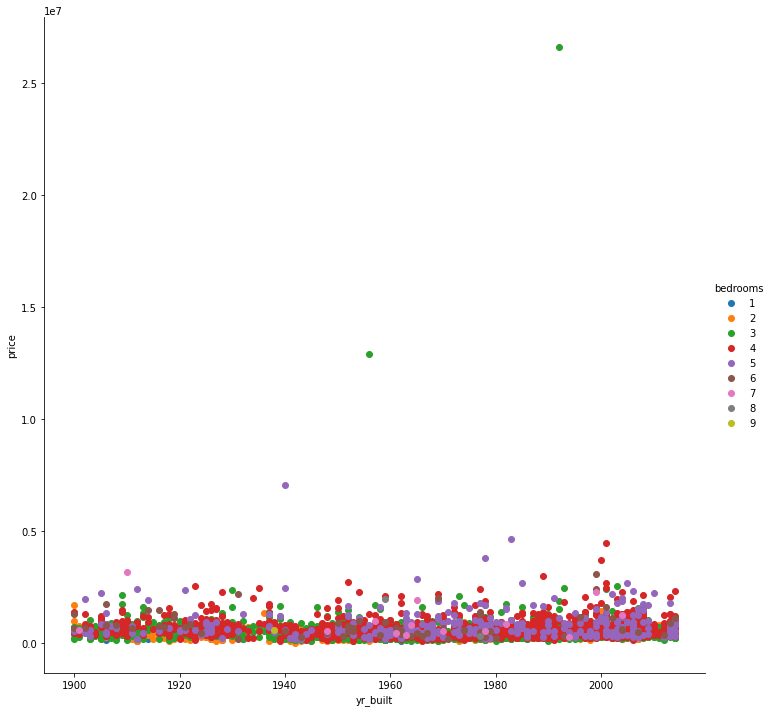

In [ ]:
# Untuk tidak memiliki variabel "Ds" dan "y" yang mana tidak dapat dilakukan forecasting, karena dalam forecasting yang paling dibutuhkan adalah variabel "Ds" dan "y"
# Maka tidak akan ada forecasting, plan forecasting, Menginterpretasikan, Feature, dan  Algoritma untuk membangun forecasting itu sendiri.

# Analisis Atribut dengan Korelasi Tinggi
import seaborn as sns
sns.FacetGrid(df_missing, hue="bedrooms", size=10) \
   .map(plt.scatter, "yr_built", "price") \
   .add_legend()


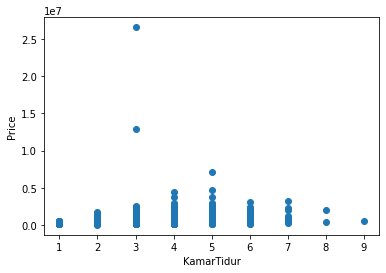

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_missing['bedrooms'], df_missing['price'])
plt.xlabel("KamarTidur")
plt.ylabel("Price")
plt.show()


Tidak ada atribut yang memiliki nilai korelasi yang tinggi karena banyak kamar tidur tidak mempengaruhi pada harga rumah itu sendiri.


# **TOPIK: DATA CLUSTERING (E1)**

1. Berdasarkan data B2, tentukan feature yang akan digunakan
2. Buatlah rencana plan clustering
3. Interpretasikan data menuju variable yang dapat digunakan
4. apakah dataset ini cocok untuk clustering?
5. analisa atribut yang memiliki korelasi tinggi?
6. pilih feature yang digunakan untuk clustering
7. pilih algoritma clustering yang tepat
8. pilih Hyperparameter yang tepat
9. analisa dataset secara sederhana
10. analisa homogenity dari clustering
11. analisa heterogenity dari clustering
12. analisa kualitas clustering dengan sklearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy as sc
sns.set(style="darkgrid")
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler

df_iris = pd.read_csv("/content/drive/My Drive/datasheet/Iris.csv")
df_iris.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


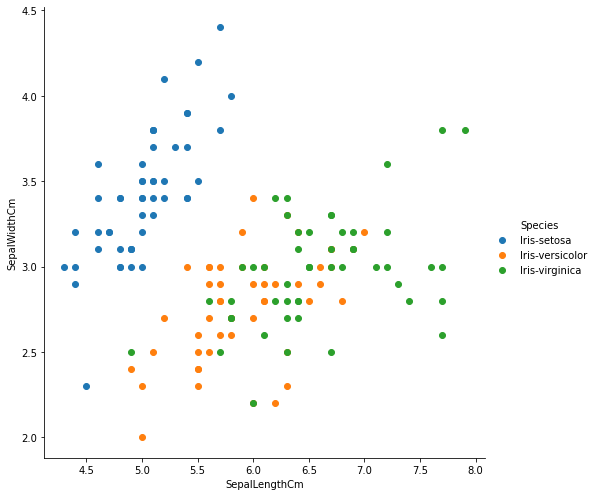

In [ ]:
sns.FacetGrid(df_iris, hue="Species", size=7) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

In [ ]:
# Menentukan variabel yang akan di klusterkan
iris_x = df_iris.iloc[:, 1:3]
iris_x.head()

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
# Menstandarkan ukuran variabel
x_array = np.array(iris_x)
scaler = MinMaxScaler()
iris_x = scaler.fit_transform(x_array)
iris_x

array([[0.22222222, 0.625     ],
       [0.16666667, 0.41666667],
       [0.11111111, 0.5       ],
       [0.08333333, 0.45833333],
       [0.19444444, 0.66666667],
       [0.30555556, 0.79166667],
       [0.08333333, 0.58333333],
       [0.19444444, 0.58333333],
       [0.02777778, 0.375     ],
       [0.16666667, 0.45833333],
       [0.30555556, 0.70833333],
       [0.13888889, 0.58333333],
       [0.13888889, 0.41666667],
       [0.        , 0.41666667],
       [0.41666667, 0.83333333],
       [0.38888889, 1.        ],
       [0.30555556, 0.79166667],
       [0.22222222, 0.625     ],
       [0.38888889, 0.75      ],
       [0.22222222, 0.75      ],
       [0.30555556, 0.58333333],
       [0.22222222, 0.70833333],
       [0.08333333, 0.66666667],
       [0.22222222, 0.54166667],
       [0.13888889, 0.58333333],
       [0.19444444, 0.41666667],
       [0.19444444, 0.58333333],
       [0.25      , 0.625     ],
       [0.25      , 0.58333333],
       [0.11111111, 0.5       ],
       [0.

In [ ]:
# Menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters = 5, random_state=123)

In [ ]:
# Menentukan kluster dari data
kmeans.fit(iris_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [ ]:
# Menampilkan pusat cluster
print(kmeans.cluster_centers_)

[[5.006      3.418      1.464      0.244     ]
 [6.20769231 2.85384615 4.74615385 1.56410256]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [7.475      3.125      6.3        2.05      ]
 [5.508      2.6        3.908      1.204     ]]


In [ ]:
# Menampilkan hasil kluster
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 4 1 1 1 4 1 4 4 1 4 1 4 1 1 4 1 4 1 4 1 1
 1 1 1 1 1 4 4 4 4 1 4 1 1 1 4 4 4 1 4 4 4 4 4 1 4 4 2 1 3 2 2 3 4 3 2 3 2
 2 2 1 2 2 2 3 3 1 2 1 3 1 2 3 1 1 2 3 3 3 2 1 1 3 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
# Menambahkan kolom "kluster" dalam data frame ritel
df_iris["kluster"] = kmeans.labels_
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,kluster,Kluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,0


In [ ]:
df_iris.drop(['Kluster'], axis=1, inplace=True)

In [ ]:
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,kluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


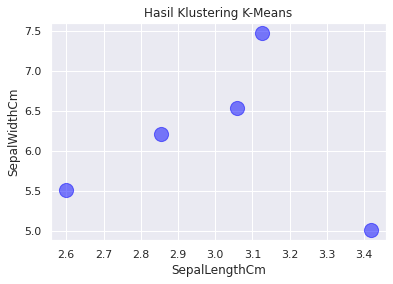

In [ ]:
# Memvisualkan hasil kluster
plt.figure
'''sct = plt.scatter(iris_x[:,1], iris_x[:,0], s = 100,
                  c = df_iris.kluster, marker = "o", alpha = 0.5)'''
centers = kmeans.cluster_centers_

plt.scatter(centers[:,1], centers[:,0], c='blue', s=200, alpha=0.5);
plt.title("Hasil Klustering K-Means")
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.show()

# **TOPIK: DATA CLASSIFICATION (F1)**

1. Berdasarkan data B3, tentukan feature yang akan digunakan
2. Buatlah rencana plan Classification
3. Interpretasikan data menuju variable yang dapat digunakan
4. apakah dataset ini cocok untuk Classification?
5. analisa atribut yang memiliki korelasi tinggi?
6. pilih feature yang digunakan untuk Classification
7. pilih algoritma Classification yang tepat
8. pilih Hyperparameter yang tepat
9. analisa dataset secara sederhana
10. analisa performa dari Classification
11. analisa akurasi dari Classification
12. analisa f-measure dengan sklearn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: UserWarning:

tight_layout not applied: number of columns in subplot specifications must be multiples of one another.



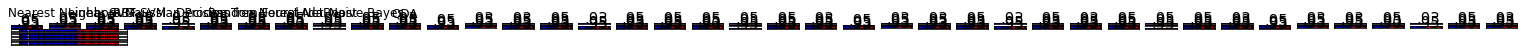

In [ ]:
#MASUKAN JAWABAN F1 disini (jika jawaban merupakan isian, gunakan comment Python #
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(heart):
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(heart), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(heart), len(classifiers) + 30, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()